In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# from xgboost import XGBRegressor

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from seaborn import heatmap

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [156]:
# #Only need this to set new categories 
# df = pd.read_csv('interpolated_full.csv')

# def setCategoryValue(x): # takes an input of 'threshold' 
#     if x <= 10: 
#         return 0
#     return 1 

# df['electric_category'] = df['Percentage Electrified'].apply(lambda x: setCategoryValue(x))
# df.to_csv('labeled_data.csv')

In [2]:
df = pd.read_csv('data.csv')
for col_name in df.columns:
        if str(col_name[:7]) == 'Unnamed':
            del df[col_name]
df.head()

,CEN_2011,NAME,eH,HH,01VIIRS_10th,02VIIRS_10th,03VIIRS_10th,04VIIRS_10th,05VIIRS_10th,06VIIRS_10th,...,B10_STD_DEV,B11_STD_DEV,B2_STD_DEV,B3_STD_DEV,B4_STD_DEV,B5_STD_DEV,B6_STD_DEV,B7_STD_DEV,percentage_electrified,electric_category
0,215991.0,108102.5,214.0,339.0,0.043099,0.077040,0.170996,0.179324,0.291569,0.161928,...,0.001737,0.001726,0.027221,0.034742,0.043921,0.086157,0.054006,0.043298,0.631268,1.0
1,215992.0,108025.5,59.0,107.0,0.419949,0.381883,0.491086,0.876705,0.542789,0.226300,...,0.001196,0.001456,0.013462,0.018037,0.019069,0.087061,0.042743,0.023066,0.551402,1.0
2,215993.0,108028.5,64.0,128.0,0.204294,0.180164,0.262577,0.376620,0.400297,0.227038,...,0.001090,0.001329,0.012730,0.016276,0.017785,0.079940,0.036686,0.019230,0.500000,1.0
3,215994.0,108056.0,118.0,726.0,0.227341,0.208226,0.287490,0.129210,0.462042,0.244227,...,0.001505,0.001741,0.014410,0.019388,0.022390,0.075418,0.038113,0.028459,0.162534,1.0
4,215995.0,108222.0,449.0,615.0,0.184173,0.188419,0.242215,0.190012,0.365727,0.189305,...,0.000851,0.001157,0.008430,0.013690,0.013010,0.073827,0.033603,0.016145,0.730081,1.0


In [3]:
up_df = pd.read_csv('up_VIIRS_features.csv')
for col_name in up_df.columns:
        if str(col_name[:7]) == 'Unnamed':
            del up_df[col_name]

In [4]:
common_features = list(set(df.columns).intersection(up_df.columns))
len(common_features)

96

In [5]:
df = df[common_features + ['electric_category']]
up_df = up_df[common_features]

In [161]:
df.head()

,10VIIRS_90th,05VIIRS_75th,11VIIRS_MIN,08VIIRS_90th,02VIIRS_25th,01VIIRS_MED,06VIIRS_90th,02VIIRS_MED,02VIIRS_MIN,11VIIRS_90th,...,11VIIRS_25th,07VIIRS_90th,12VIIRS_MED,05VIIRS_MAX,07VIIRS_MED,09VIIRS_STD_DEV,10VIIRS_75th,12VIIRS_STD_DEV,01VIIRS_25th,electric_category
0,1.830053,0.791290,0.143617,1.805664,0.119314,0.259888,0.949780,0.279763,0.028612,2.482151,...,0.229550,0.465437,0.468227,3.043473,0.122967,0.665348,1.098403,0.948405,0.141905,1.0
1,2.414498,0.999446,0.432004,1.824237,0.399546,0.996378,0.896220,0.952887,0.247185,4.060113,...,1.002166,0.517286,1.291024,1.519710,0.284441,0.326259,1.793378,0.834996,0.447419,1.0
2,1.389952,0.925082,0.248996,1.635124,0.245895,0.378659,0.767143,0.381883,0.149592,1.944449,...,0.432004,0.366430,0.672792,2.074950,0.131265,0.264308,1.095507,0.749747,0.253992,1.0
3,1.679215,1.405934,0.372623,1.879305,0.394666,0.515752,1.293099,0.823036,0.208226,3.918402,...,0.575842,1.012277,1.458301,2.074950,0.218857,0.220380,1.626284,1.216814,0.283062,1.0
4,1.302816,0.699616,0.258041,0.976926,0.245895,0.254172,0.589734,0.298788,0.159631,0.740212,...,0.397292,0.201050,0.527981,1.048346,0.122134,0.114933,0.788220,0.520955,0.195713,1.0


In [6]:
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df = df[np.isfinite(df['electric_category'])]
df = df.interpolate(axis=1)
df.shape

(30457, 97)

In [7]:
for col in up_df:
    up_df[col] = pd.to_numeric(up_df[col], errors='coerce')
    
up_df = up_df.interpolate(axis=1)
up_df.shape

(2432, 96)

In [8]:
# # Keep full df for later
# scaler = MinMaxScaler(feature_range=(0, 1))

# df_full = df.copy()
# all_X = df_full.drop(['Census 2011 ID', 'Percentage Electrified', 'Number of Electrified Households', 
#                       'Village Name','District Name','State Name', 'electric_category'], axis = 1)
# all_X_scaled = pd.DataFrame(scaler.transform(all_X), columns = all_X.columns)
# all_Y = df_full[['electric_category']].values 
# print (all_X_scaled.shape)

# Train test split 
df, test_data_df = train_test_split(df, test_size=0.3)

In [9]:
df0 = df[df.electric_category == 0]
df1 = df[df.electric_category == 1]

print ('Sizes before sampling: ', df1.shape, df0.shape)

df0 = resample(df0, 
                replace=True,     # sample with replacement
                n_samples=12000,  # to match majority class, Was 10000 
                random_state=123) # reproducible results. 

df1 = resample(df1, n_samples = 12000)
df = pd.concat([df1, df0])


Sizes before sampling:  (19920, 97) (1399, 97)


In [10]:
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# Training 
X_training = df.drop(['electric_category'], axis = 1)
X_training_scaled = pd.DataFrame(scaler.fit_transform(X_training), columns = X_training.columns)
Y_training = df[['electric_category']].values

# Testing
X_testing = test_data_df.drop(['electric_category'], axis = 1)
X_testing_scaled = pd.DataFrame(scaler.transform(X_testing), columns = X_testing.columns)
Y_testing = test_data_df[['electric_category']].values

up_df_test = pd.DataFrame(scaler.transform(up_df), columns = up_df.columns)
X_training_scaled.head()

,04VIIRS_25th,09VIIRS_10th,12VIIRS_25th,01VIIRS_MIN,06VIIRS_MAX,08VIIRS_25th,11VIIRS_90th,10VIIRS_MAX,01VIIRS_STD_DEV,05VIIRS_75th,...,03VIIRS_MAX,10VIIRS_MIN,11VIIRS_10th,06VIIRS_MED,12VIIRS_STD_DEV,06VIIRS_MIN,05VIIRS_MAX,07VIIRS_MED,06VIIRS_75th,12VIIRS_75th
0,0.006801,0.011002,0.001969,0.014841,0.010227,0.013486,0.010546,0.007673,0.013342,0.002974,...,0.010180,0.009756,0.014374,0.013087,0.001475,0.011396,0.004180,0.052926,0.013424,0.000663
1,0.002713,0.006501,0.004070,0.008536,0.001283,0.008701,0.002248,0.001345,0.006095,0.000668,...,0.001892,0.003058,0.002529,0.002505,0.000548,0.003712,0.000838,0.017839,0.002277,0.001582
2,0.010484,0.011439,0.018530,0.033602,0.012798,0.013664,0.014609,0.011346,0.003521,0.005161,...,0.021907,0.020555,0.022837,0.019220,0.000000,0.017209,0.007952,0.066023,0.017651,0.013890
3,0.013144,0.013663,0.014552,0.018962,0.027159,0.012105,0.023047,0.020378,0.042875,0.007903,...,0.044486,0.010716,0.013756,0.021206,0.014314,0.014689,0.018143,0.048653,0.022234,0.013187
4,0.023179,0.016936,0.019780,0.027314,0.023404,0.020400,0.019759,0.016380,0.029406,0.012156,...,0.035141,0.019095,0.030543,0.031713,0.014435,0.019319,0.014261,0.107671,0.034046,0.024574


In [167]:
# X_testing_scaled.head()
up_df_test.head()

,10VIIRS_90th,05VIIRS_75th,11VIIRS_MIN,08VIIRS_90th,02VIIRS_25th,01VIIRS_MED,06VIIRS_90th,02VIIRS_MED,02VIIRS_MIN,11VIIRS_90th,...,08VIIRS_10th,11VIIRS_25th,07VIIRS_90th,12VIIRS_MED,05VIIRS_MAX,07VIIRS_MED,09VIIRS_STD_DEV,10VIIRS_75th,12VIIRS_STD_DEV,01VIIRS_25th
0,0.006791,0.009339,0.018119,0.004911,0.009079,0.013602,0.008485,0.008000,0.009708,0.002865,...,0.015249,0.006897,0.021276,0.009423,0.007631,0.042366,0.003531,0.008256,0.002135,0.013557
1,0.011477,0.015749,0.026523,0.009958,0.019359,0.039225,0.017819,0.021137,0.017179,0.010058,...,0.022655,0.019748,0.034476,0.027090,0.013551,0.057367,0.003623,0.018334,0.002065,0.032055
2,0.023400,0.046363,0.057372,0.015035,0.080693,0.095230,0.035100,0.088361,0.066341,0.011997,...,0.052561,0.044917,0.079306,0.043497,0.019199,0.171282,0.001002,0.038703,0.000773,0.099397
3,0.017595,0.026494,0.029624,0.013297,0.027529,0.036812,0.032346,0.029585,0.025716,0.009989,...,0.029056,0.019049,0.062796,0.021097,0.023088,0.079468,0.006550,0.016336,0.005647,0.035323
4,0.018746,0.018617,0.026665,0.011018,0.020402,0.030028,0.019723,0.018571,0.017044,0.016670,...,0.024657,0.020704,0.041170,0.022970,0.016890,0.062995,0.008496,0.022868,0.016049,0.027144


In [168]:
X_training_scaled.shape

(24000, 96)

In [11]:
X_train = X_training_scaled
Y_train = Y_training.ravel()
X_test = X_testing_scaled

In [16]:
# pca = PCA(n_components=100)
# pca.fit(X_training_scaled)
# X_training_scaled = pca.transform(X_training_scaled)
# X_training_scaled.shape

In [17]:
# print(pca.explained_variance_ratio_)  

In [21]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train) 
melb_preds = forest_model.predict(X_test)

In [22]:
print ('The accuracy is {}, with {} villages correctly classified.'.format(accuracy_score(Y_testing,melb_preds), 
                                                        accuracy_score(Y_testing, melb_preds, normalize=False)))

The accuracy is 0.8968045524184723, with 8195 villages correctly classified.


In [15]:
test_data_df['predictions'] = melb_preds
test_data_df.head()

,Census 2011 ID,Village Name,District Name,State Name,Number of Households,Number of Electrified Households,Percentage Electrified,min,10th_percentile,median,...,rain_may_90th,rain_jun_90th,rain_jul_90th,rain_aug_90th,rain_sep_90th,rain_oct_90th,rain_nov_90th,rain_dec_90th,electric_category,predictions
14763,237275,Ghosd Ahabanpur,Samastipur,Bihar,152.0,10.0,6.578947,0.210984,0.227739,0.241533,...,201.281799,135.005600,269.214386,188.122604,327.114594,76.542801,0.0,0.0000,0,0
10734,229559,Chamrahra urf Lalpur,Muzaffarpur,Bihar,362.0,317.0,87.569061,0.539362,0.552147,0.711388,...,318.030212,159.403992,244.636993,150.876190,214.521988,42.013798,0.0,0.0000,1,1
12281,234737,Jarang Rampur,Vaishali,Bihar,357.0,252.0,70.588235,0.722869,0.743632,1.004954,...,306.500000,176.862396,273.881989,164.663193,245.289993,67.594398,0.0,0.0000,1,1
30101,254047,Mahdewa,Aurangabad,Bihar,90.0,17.0,18.888889,0.518291,0.518291,0.679025,...,82.528397,206.650192,281.338776,281.045197,561.862183,73.131195,0.0,0.6182,1,0
10232,233023,Hasanpur Bina,Saran,Bihar,122.0,84.0,68.852459,0.193255,0.225636,0.321392,...,245.207001,143.939590,265.574005,177.763397,190.477997,100.190598,0.0,0.0000,1,1


In [16]:
X_train.shape

(24000, 339)

In [17]:
X_test.shape

(6679, 339)

In [22]:
# K fold cross validation 
c, r = Y_testing.shape
Y_testing = Y_testing.reshape(c,)

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_test, Y_testing, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.93124066  0.93423019  0.93273543  0.93572496  0.93413174  0.93253373
  0.93553223  0.93103448  0.93553223  0.93103448]
Average Accuracy: 0.93337301436
Standard Deviation: 0.00181002354388


In [ ]:
estimators = np.arange(5, 50, 5)
learning_rates = np.arange(.01, 2, .05)
d = {}
for es in estimators: 
    for lr in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=es, learning_rate = lr, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train, Y_train)
        predictions = gb.predict(X_test)
        d[str(es) + ' ' + str(lr)] = confusion_matrix(Y_testing, predictions)[0][0]
sorted(d.items(), key=lambda x:x[1])

In [170]:
gb = GradientBoostingClassifier(n_estimators=15, learning_rate = .46, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_testing, predictions))
print()
print("Classification Report")
print(classification_report(Y_testing, predictions))

Confusion Matrix:
[[ 353  238]
 [2748 5799]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.11      0.60      0.19       591
        1.0       0.96      0.68      0.80      8547

avg / total       0.91      0.67      0.76      9138



In [171]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(gb.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [172]:
importances.head(10)

,importance
feature,
08VIIRS_90th,0.060
12VIIRS_MED,0.055
07VIIRS_75th,0.054
02VIIRS_75th,0.053
04VIIRS_MIN,0.044
11VIIRS_MIN,0.043
06VIIRS_MIN,0.035
06VIIRS_STD_DEV,0.034
02VIIRS_90th,0.034


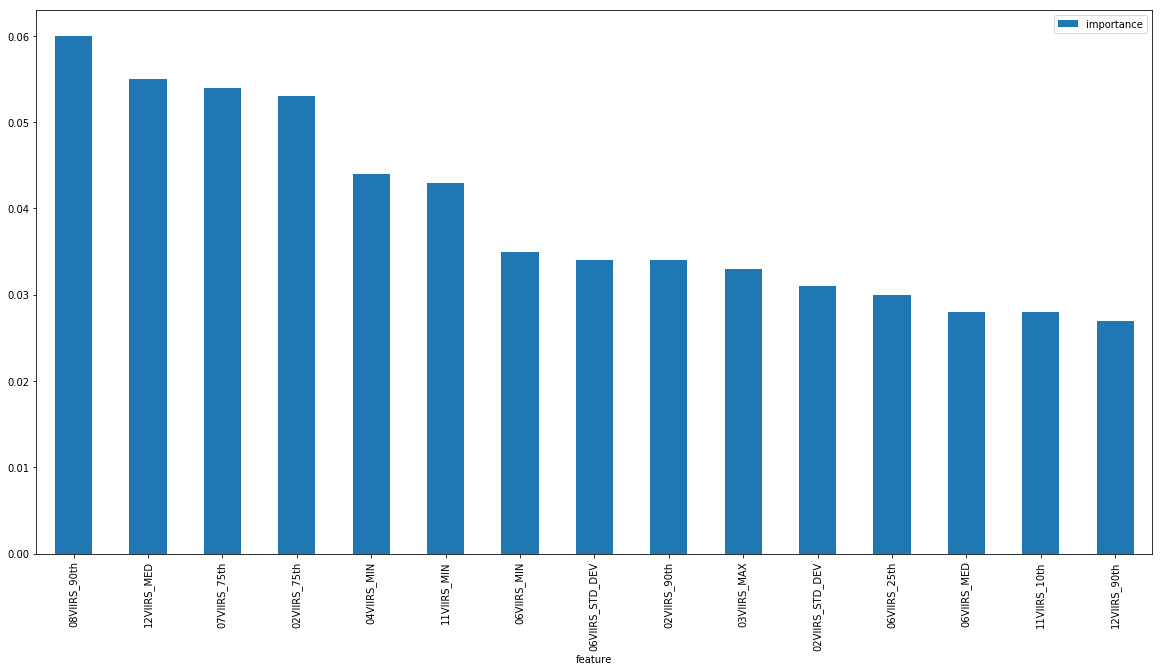

In [173]:
importances.head(15).plot.bar(figsize=(20,10))

In [136]:
up_predictions = gb.predict(up_df_test)
up_df['predictions'] = up_predictions

In [139]:
up_df.head()
up_df.to_csv('up_predictions_sham.csv')

In [140]:
up_df.head()

,10VIIRS_90th,05VIIRS_75th,11VIIRS_MIN,08VIIRS_90th,02VIIRS_25th,01VIIRS_MED,06VIIRS_90th,02VIIRS_MED,02VIIRS_MIN,11VIIRS_90th,...,11VIIRS_25th,07VIIRS_90th,12VIIRS_MED,05VIIRS_MAX,07VIIRS_MED,09VIIRS_STD_DEV,10VIIRS_75th,12VIIRS_STD_DEV,01VIIRS_25th,predictions
0,1.124405,0.811114,0.227336,0.773587,0.245909,0.282909,0.835816,0.274620,0.194990,0.618267,...,0.281522,0.919080,0.327331,1.459925,0.637076,0.243240,0.824209,0.135541,0.256448,0.0
1,1.813267,1.258518,0.613887,1.717331,0.667060,1.032819,1.685275,0.871414,0.501654,2.154256,...,0.877116,1.492127,1.068749,2.457788,0.925623,0.249575,1.680653,0.131101,0.776970,1.0
2,3.566083,3.395302,2.032920,2.666771,3.179831,2.671947,3.258096,3.925456,2.519553,2.568383,...,2.043681,3.438317,1.757294,3.409639,3.116736,0.068993,3.411760,0.049086,2.671947,1.0
3,2.712684,2.008509,0.756542,2.341619,1.001791,0.962196,3.007378,1.255218,0.852063,2.139632,...,0.844724,2.721560,0.817252,4.065116,1.350738,0.451166,1.510883,0.358543,0.868945,1.0
4,2.881839,1.458712,0.620414,1.915555,0.709787,0.763647,1.858607,0.754831,0.496113,3.566224,...,0.921422,1.782715,0.895839,3.020613,1.033873,0.585185,2.065999,1.018937,0.638791,1.0


In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score


lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

pred_reg = lm.predict(X_test)
accuracy_score(Y_testing, pred_reg)

In [14]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# # Logging for Visual Comparison
# log_cols=["Classifier", "Accuracy", "Log Loss"]
# log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    predictions = clf.predict(X_test)
    acc = accuracy_score(Y_testing, predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_testing, predictions)
    print("Log Loss: {}".format(ll))
    print("Precision:", precision_score(Y_testing, predictions))
    print("Recall:",recall_score(Y_testing, predictions))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 78.6277%
Log Loss: 7.381761232904798
Precision: 0.948488545479192
Recall: 0.8164527421236872


NameError: name 'log_cols' is not defined

In [183]:
pred_reg

array([1., 1., 0., ..., 0., 1., 0.])

In [23]:
# K fold cross validation 
c, r = Y_training.shape
Y_training = Y_training.reshape(c,)

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_training, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.98875     0.98791667  0.985       0.98833333  0.98625     0.98375
  0.98541667  0.98333333  0.98833333  0.98375   ]
Average Accuracy: 0.986083333333
Standard Deviation: 0.00201728640615


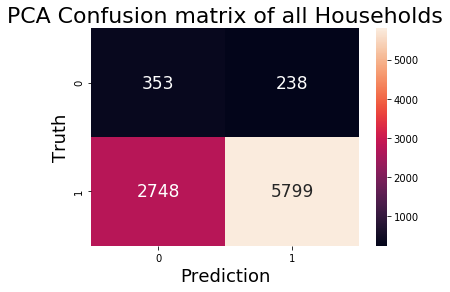

In [174]:
def plot_confusion_matrix(title): 
    predictions = gb.predict(X_test)
    conf_matrix = confusion_matrix(Y_testing, predictions)
    heatmap(conf_matrix, annot=True, fmt="d", annot_kws={"size":17})
    plt.xlabel('Prediction', fontsize=18)
    plt.ylabel('Truth', fontsize=18)
    plt.title(title, fontsize=22)
    plt.show()
    
plot_confusion_matrix('PCA Confusion matrix of all Households')

In [175]:
predictions = gb.predict(X_test)

In [176]:
# F-Score
from sklearn.metrics import f1_score
f1_score(Y_testing, predictions)

0.7952550740537576

In [177]:
# Precision and Recall


print("Precision:", precision_score(Y_testing, predictions))
print("Recall:",recall_score(Y_testing, predictions))

Precision: 0.9605764452542653
Recall: 0.6784836784836785


In [148]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = gb.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_testing, y_scores)

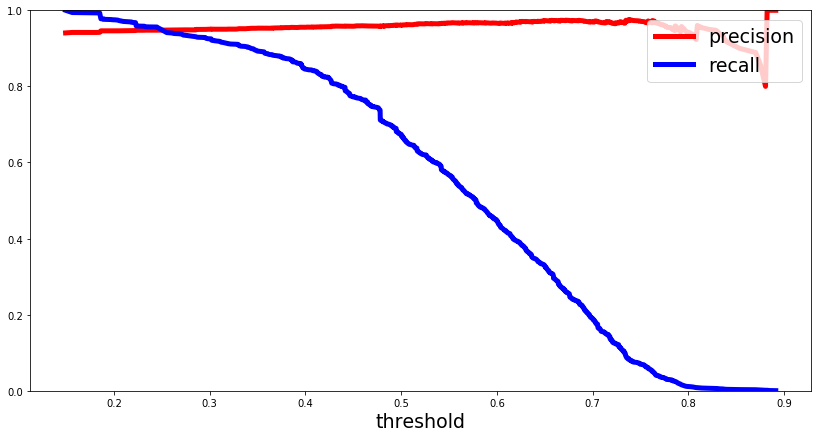

In [149]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

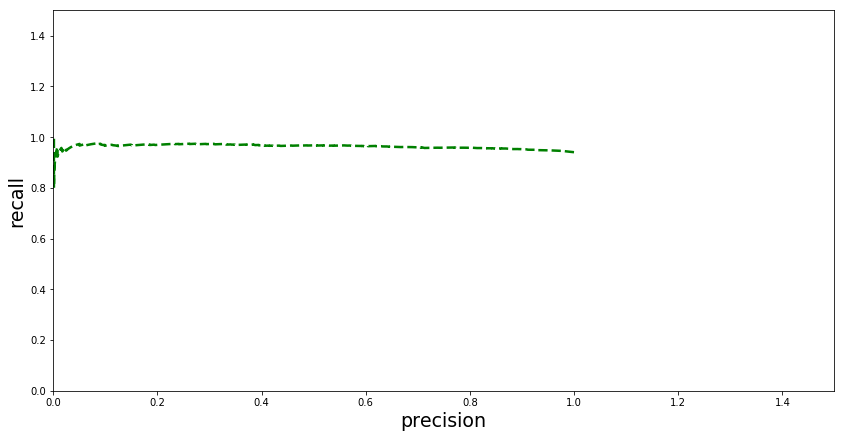

In [178]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [179]:
# ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_testing, y_scores)

ValueError: Found input variables with inconsistent numbers of samples: [9138, 3046]

In [15]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 10))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

NameError: name 'false_positive_rate' is not defined

In [153]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_testing, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6707152833200318
